In [250]:
import numpy as np # Importing the NumPy library for numerical operations

import pandas as pd # Importing the Pandas library for data manipulation and analysis

from sklearn.preprocessing import StandardScaler # Importing StandardScaler for feature scaling (standardization)

from sklearn.model_selection import GridSearchCV # Importing GridSearchCV for hyperparameter tuning using cross-validation

from imblearn.over_sampling import SMOTE # Importing SMOTE (Synthetic Minority Over-sampling Technique) for handling imbalanced datasets

from imblearn.pipeline import Pipeline # Importing Pipeline from imbalanced-learn to create a streamlined workflow for preprocessing and modeling

from sklearn.linear_model import SGDClassifier # Importing SGDClassifier, a linear classifier that uses Stochastic Gradient Descent

from sklearn.svm import SVC # Support Vector Classifier for classification tasks

from sklearn.naive_bayes import MultinomialNB # Multinomial Naive Bayes Classifier for categorical data

from sklearn import metrics # Importing metrics for model evaluation

from sklearn.linear_model import SGDClassifier # SGDClassifier for linear classification tasks

import joblib  # Joblib for efficient serialization of Python objects, such as trained models


import warnings # Importing the warnings library to manage warning messages

warnings.filterwarnings("ignore", category=FutureWarning) # Suppressing FutureWarnings to avoid cluttering the output with warnings about deprecated features

from sklearn.impute import SimpleImputer # SimpleImputer for filling in missing values in the dataset

from sklearn.neural_network import MLPClassifier  # MLPClassifier for building neural network models

from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer # Importing various scoring metrics for model evaluation

from sklearn.metrics import confusion_matrix # Confusion matrix for evaluating classification performance

import seaborn as sns # Seaborn for creating attractive statistical graphics

import matplotlib.pyplot as plt # Matplotlib for creating static, animated, and interactive visualizations

from sklearn.model_selection import train_test_split # Function for splitting data into training and testing sets

from sklearn.preprocessing import LabelEncoder # LabelEncoder for converting categorical labels into numerical format

In [251]:
file_path= '/content/Data Mining Dataset.csv' # Defining the file path for the dataset

In [252]:
dataset=pd.read_csv(file_path) # Read the CSV file specified by file_path into a DataFrame named 'dataset'

In [253]:
dataset.head() # Print the first 5 rows of the DataFrame to inspect the data

Tumor_Radius  Tumor_Texture  Tumor_Perimeter   Tumor_Area  \
0     14.363503      10.468227       131.519340  1690.990994   
1     28.767858       9.879152       168.869173   596.488633   
2     23.299849      36.250183       161.625749  2206.507496   
3     19.966462       9.981848        64.623985  1610.167350   
4      8.900466      10.877989        63.879915   561.568932   

   Tumor_Smoothness  Tumor_Compactness  Tumor_Concavity  Tumor_Symmetry  \
0          0.158040           0.218138         0.327153        0.129270   
1          0.153092           0.199810         0.040016        0.135791   
2          0.064363           0.129269         0.121165        0.360789   
3          0.188386           0.323270         0.386840        0.294776   
4          0.135271           0.264481         0.264343        0.416166   

   Tumor_Fractal_Dimension  Age  Diagnosis  Tumor_Density  
0                 0.050220   43          1       1.380272  
1                 0.050017   59          1       1.305162  
2                 0.073613   40          1       2.008437  
3                 0.051465   48          1       1.715999  
4                 0.098727   70          1       1.955195

In [254]:
dataset.shape # Print the number of rows and columns in the DataFrame

(2000, 12)

In [255]:
dataset.isnull().sum() # Count the number of missing values in each column

Tumor_Radius               0
Tumor_Texture              0
Tumor_Perimeter            0
Tumor_Area                 0
Tumor_Smoothness           0
Tumor_Compactness          0
Tumor_Concavity            0
Tumor_Symmetry             0
Tumor_Fractal_Dimension    0
Age                        0
Diagnosis                  0
Tumor_Density              0
dtype: int64

In [256]:
dataset.info() # Print a summary of the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tumor_Radius             2000 non-null   float64
 1   Tumor_Texture            2000 non-null   float64
 2   Tumor_Perimeter          2000 non-null   float64
 3   Tumor_Area               2000 non-null   float64
 4   Tumor_Smoothness         2000 non-null   float64
 5   Tumor_Compactness        2000 non-null   float64
 6   Tumor_Concavity          2000 non-null   float64
 7   Tumor_Symmetry           2000 non-null   float64
 8   Tumor_Fractal_Dimension  2000 non-null   float64
 9   Age                      2000 non-null   int64  
 10  Diagnosis                2000 non-null   int64  
 11  Tumor_Density            2000 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 187.6 KB


In [257]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tumor_Radius             2000 non-null   float64
 1   Tumor_Texture            2000 non-null   float64
 2   Tumor_Perimeter          2000 non-null   float64
 3   Tumor_Area               2000 non-null   float64
 4   Tumor_Smoothness         2000 non-null   float64
 5   Tumor_Compactness        2000 non-null   float64
 6   Tumor_Concavity          2000 non-null   float64
 7   Tumor_Symmetry           2000 non-null   float64
 8   Tumor_Fractal_Dimension  2000 non-null   float64
 9   Age                      2000 non-null   int64  
 10  Diagnosis                2000 non-null   int64  
 11  Tumor_Density            2000 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 187.6 KB


In [258]:
print(dataset['Diagnosis'].unique()) # Display the unique values in the 'Diagnosis' column

[1 0]


In [259]:
x=dataset.drop(['Diagnosis'],axis=1) # Create a new DataFrame 'x' without the 'Diagnosis' column

In [260]:
y=dataset['Diagnosis']  # Creating a variable 'y' for the target variable

In [261]:
x.shape # Printing the number of rows and columns in the DataFrame 'x'

(2000, 11)

In [262]:
y.shape # Print the number of elements in the Series 'y'

(2000,)

In [263]:
# Normalizing numerical features so that each feature has mean 0 and variance 1

feature_scaler = StandardScaler() # Creating an instance of StandardScaler
x_scaled = feature_scaler.fit_transform(x) # Fitting the scaler to the features and transforming them in 'x'

In [264]:
"""**Buliding test and train data by splitting the data in test and train**"""

# Importing the model_selection module from the sklearn (scikit-learn) library
# and give it the call function 'sm' for easy reference
import sklearn.model_selection as sm

In [265]:
# Splitting the dataset into training and testing sets.
# The test size is set to 30%, meaning 70% of the data will be used for training and 30% for testing.
# 'random_state=1' ensures the split is reproducible with the same data each time the code is run.
x_train, x_test, y_train, y_test= sm.train_test_split(x_scaled,y, test_size=0.3, random_state=1)

In [266]:
x_train.shape # Print the number of rows and columns in the training feature set
x_test.shape # Print the number of rows and columns in the testing feature set

# Checking the distribution of the target variable in the training set
y_train.value_counts() # This code counts the occurrences of each unique value in the y_train Series

Diagnosis
0    885
1    515
Name: count, dtype: int64

In [267]:
# Split the dataset into training and testing sets.
# The test size is set to 30%, meaning 70% of the data will be used for training and 30% for testing.
# 'random_state=100' ensures the split is reproducible with the same data each time the code is run.
#Changed the random state to get samples of both classes in the train set
x_train, x_test, y_train, y_test= sm.train_test_split(x_scaled,y, test_size=0.3, random_state=100)

In [268]:
x_train.shape

x_test.shape

y_train.value_counts() # This code counts the occurrences of each unique value in the y_train Series

Diagnosis
0    897
1    503
Name: count, dtype: int64

In [269]:
dataset.info()  # Print a summary of the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tumor_Radius             2000 non-null   float64
 1   Tumor_Texture            2000 non-null   float64
 2   Tumor_Perimeter          2000 non-null   float64
 3   Tumor_Area               2000 non-null   float64
 4   Tumor_Smoothness         2000 non-null   float64
 5   Tumor_Compactness        2000 non-null   float64
 6   Tumor_Concavity          2000 non-null   float64
 7   Tumor_Symmetry           2000 non-null   float64
 8   Tumor_Fractal_Dimension  2000 non-null   float64
 9   Age                      2000 non-null   int64  
 10  Diagnosis                2000 non-null   int64  
 11  Tumor_Density            2000 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 187.6 KB


## Logistic Regression

In [270]:
from sklearn.metrics import confusion_matrix # Importing the confusion_matrix function from sklearn.metrics
from sklearn.compose import ColumnTransformer # Importing ColumnTransformer from sklearn.compose

In [271]:
# Implementing Logistic Regression
# Tuning eta0, max_iter, alpha, and l1_ratio parameters and implementing cross-validation using Grid Search

model = Pipeline([
        ('preprocessing', ColumnTransformer([
        ('scaler', StandardScaler(), slice(0, x_train.shape[1]))  # Strandardize all features in x_train
    ])),
        ('imputation', SimpleImputer(strategy='mean')), # Impute missing values with the mean
        ('balancing', SMOTE(random_state = 110)),    # Apply SMOTE to balance the classes in the dataset

        ('classification', SGDClassifier(loss = 'log_loss', penalty = 'elasticnet', random_state = 7)) # Classifier with specified loss and penalty

    ])

# Defining the hyperparameter grid for tuning
grid_param = {'classification__eta0': [.001,.01,0.1], # Learning rate
              'classification__max_iter' : [500,1000,1500,2000], # Number of iterations for the classifier
              'classification__alpha': [0.0001, 0.001, 0.01, 0.1], # Regularization strength
              'classification__l1_ratio': [0.2, 0.5, 0.7, 0.9,1]} # Ratio of L1 regularization

gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='recall', cv=7) # Setting up GridSearchCV for hyperparameter tuning

gd_sr.fit(x_train, y_train) # Fitting the model with the training data

best_parameters = gd_sr.best_params_ # Retrieving the best parameters found during grid search

print("Best parameters: ", best_parameters) # Printing the best parameters

Best parameters:  {'classification__alpha': 0.0001, 'classification__eta0': 0.001, 'classification__l1_ratio': 0.9, 'classification__max_iter': 500}


In [272]:
predictions = gd_sr.best_estimator_.predict(x_train) # Making predictions on the training set using the best estimator from GridSearchCV


In [273]:
# Printing the predictions
print("Model Predictions: ", predictions)
best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result) # Print the best score obtained during the grid search
print(f"Logistic Regression Best recall (using GridSearchCV): {best_result:.4f}") # Print the best recall score formatted to four decimal places

Model Predictions:  [1 1 1 ... 1 0 1]
0.5961882405544378
Logistic Regression Best recall (using GridSearchCV): 0.5962


In [274]:
# Getting the predictions on the validation sets
y_pred_val = gd_sr.predict(x_test)  # Making predictions on the test set using the best estimator from GridSearchCV

# Counting predicted malignant and benign cases
predicted_malignant = sum(predictions)  # Calculate the number of predicted malignant cases
predicted_benign = len(predictions) - predicted_malignant  # Calculate the number of predicted benign cases

# Printing the results
print(f"Predicted Malignant Cases: {predicted_malignant}")
print(f"Predicted Benign Cases: {predicted_benign}")

# Calculate metrics on the validation sets
accuracy_val = accuracy_score(y_test, y_pred_val) # Accuracy is the ratio of correctly predicted instances to the total instances.
precision_val = precision_score(y_test, y_pred_val) # Precision is the ratio of true positive predictions to the total predicted positives.
recall_val = recall_score(y_test, y_pred_val) # Recall (or sensitivity) is the ratio of true positive predictions to the total actual positives.

# Print the evaluation metrics with formatting to four decimal places
print(f"Logistic Regression Accuracy on validation set: {accuracy_val:.4f}")
print(f"Logistic Regression Precision on validation set: {precision_val:.4f}")
print(f"Logistic Regression Recall on validation set: {recall_val:.4f}")

Predicted Malignant Cases: 915
Predicted Benign Cases: 485
Logistic Regression Accuracy on validation set: 0.4267
Logistic Regression Precision on validation set: 0.3415
Logistic Regression Recall on validation set: 0.6542


## Support Vector Classification

In [275]:
from sklearn.svm import SVC # Importing the Support Vector Classifier from sklearn

In [276]:
model = Pipeline([
        ('imputation', SimpleImputer(strategy='mean')), # Step 1: Impute missing values with the mean of each column
            # This step replaces any missing values in the dataset with the mean value of the respective feature.

        ('balancing', SMOTE(random_state = 2)),  # Step 2: Apply SMOTE to balance the classes in the dataset
        # SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority class
        # to address class imbalance, which can improve model performance.

        ('classification',SVC(random_state=40) )# Step 3: Classify using Support Vector Classifier
        # The SVC is initialized with a random state for reproducibility. It will be used to fit the model
        # after the imputation and balancing steps have been applied.
    ])

In [277]:
# Defining the hyperparameter grid for tuning the SVC classifier
grid_param = {
    'classification__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # Different kernel types to try

    'classification__C': [0.001, 0.01, 0.1, 1, 5, 10],  # Range of values for the regularization parameter C
    # C controls the trade-off between achieving a low training error and a low testing error.
    # Smaller values of C create a larger margin, while larger values aim to classify all training points correctly.

    'classification__gamma': ['scale', 'auto', 0.001, 0.01, 0.1]   # Values for the gamma parameter
    # Gamma defines how far the influence of a single training example reaches.
    # 'scale': 1 / (n_features * X.var()) as the default value.
    # 'auto': 1 / n_features.
    # Smaller values of gamma mean a larger radius of influence, while larger values mean a smaller radius.
}

In [278]:
# Setting up GridSearchCV for hyperparameter tuning of the SVC model
gd_sr_SVR= GridSearchCV(estimator=model, # The pipeline model that includes preprocessing and classification steps
param_grid=grid_param, # The hyperparameter grid defined earlier for tuning
scoring='recall', # The metric to optimize during the grid search
cv=7 # Number of cross-validation folds
)

In [240]:
gd_sr_SVR.fit(x_train, y_train) # Fitting the GridSearchCV object to the training data

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('imputation', SimpleImputer()),
                                       ('balancing', SMOTE(random_state=2)),
                                       ('classification',
                                        SVC(random_state=40))]),
             param_grid={'classification__C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'classification__gamma': ['scale', 'auto', 0.001, 0.01,
                                                   0.1],
                         'classification__kernel': ['linear', 'poly', 'rbf',
                                                    'sigmoid']},
             scoring='recall')

In [241]:
best_parameters = gd_sr_SVR.best_params_ # Retrieve the best parameters found during the grid search
print(f"SVC Best parameters: {best_parameters}") # Print the best parameters in a formatted string

SVC Best parameters: {'classification__C': 0.001, 'classification__gamma': 'scale', 'classification__kernel': 'poly'}


In [242]:
best_result = gd_sr_SVR.best_score_ # Mean cross-validated score of the best_estimator

print(best_result) # Print the best score

0.8570031298904538


In [243]:
# Print the best recall score obtained during the grid search, formatted to four decimal places
print(f"SVC Best recall (using GridSearchCV): {best_result:.4f}")

SVC Best recall (using GridSearchCV): 0.8570


In [244]:
# Get the predictions on the validation sets
y_pred_val = gd_sr_SVR.predict(x_test)  # Predict on the test data


In [245]:
# Calculate metrics on the validation sets
accuracy_val = accuracy_score(y_test, y_pred_val) # Accuracy is the ratio of correctly predicted instances to the total instances.
precision_val = precision_score(y_test, y_pred_val) # Precision is the ratio of true positive predictions to the total predicted positives.
recall_val = recall_score(y_test, y_pred_val) # Recall (or sensitivity) is the ratio of true positive predictions to the total actual positives.

In [246]:
# Printing metrices of the SVC model on the validation set, formatted to four decimal places
print(f"SVC Accuracy on validation set: {accuracy_val:.4f}")
print(f"SVC Precision on validation set: {precision_val:.4f}")
print(f"SVC Recall on validation set: {recall_val:.4f}")

SVC Accuracy on validation set: 0.3567
SVC Precision on validation set: 0.3497
SVC Recall on validation set: 0.9346


In [247]:
# Generating the confusion matrix for the test set predictions

cm = confusion_matrix(y_test, y_pred_val)

# Unpacking the confusion matrix into its components
TN, FP, FN, TP = cm.ravel()

# Printing the values of the confusion matrix components
print(f"SVC True Positives (TP): {TP}")
print(f"SVC True Negatives (TN): {TN}")
print(f"SVC False Positives (FP): {FP}")
print(f"SVC False Negatives (FN): {FN}")

SVC True Positives (TP): 200
SVC True Negatives (TN): 14
SVC False Positives (FP): 372
SVC False Negatives (FN): 14


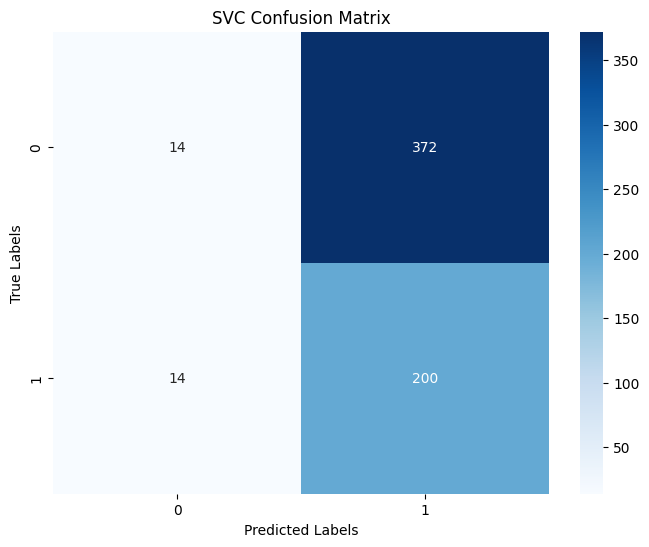

In [248]:
# Generating the confusion matrix for the test set predictions

cm = confusion_matrix(y_test, y_pred_val)
plt.figure(figsize=(8, 6)) # Setting up the figure size for the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") # Creating a heatmap for the confusion matrix
# Set the title and labels for the heatmap
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## K-Nearest Neighbors (KNN)

In [249]:
# Importing necessary libraries and modules

from sklearn.model_selection import GridSearchCV # For hyperparameter tuning using grid search
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors classifier
from sklearn.pipeline import Pipeline # For creating a machine learning pipeline
from imblearn.over_sampling import SMOTE # For handling class imbalance using SMOTE
from sklearn.impute import SimpleImputer # For handling missing values
from sklearn.metrics import accuracy_score, precision_score, recall_score # For evaluating model performance
from sklearn.model_selection import StratifiedKFold # For stratified cross-validation
from imblearn.pipeline import make_pipeline # For creating a pipeline compatible with imbalanced datasets

# Define pipeline with imputation, SMOTE, and KNN classifier
# Use make_pipeline which is compatible with SMOTE
model = make_pipeline(
    SimpleImputer(strategy='mean'),  # Step 1: Handle missing values by replacing them with the mean
    SMOTE(random_state=101),  # Step 2: Apply SMOTE to handle class imbalance
    KNeighborsClassifier()  # Step 3: Use K-Nearest Neighbors classifier for classification
)

# Define hyperparameters for tuning (expanded grid)
grid_param = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10, 15, 20, 25, 30, 45, 60, 75, 90],  # Test different K values
    'kneighborsclassifier__weights': ['uniform', 'distance'],   # Test different weighting methods for neighbors
    'kneighborsclassifier__metric': ['euclidean', 'manhattan'],  # Test different distance metrics
    'kneighborsclassifier__leaf_size': [10, 20, 30, 40, 50],  # Test different leaf sizes for the KNN algorithm
    'kneighborsclassifier__p': [1, 2],  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Define StratifiedKFold for better cross-validation that preserves class distribution
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

# Perform grid search with cross-validation to find the best hyperparameters
gd_sr_KNN = GridSearchCV(estimator=model, param_grid=grid_param, scoring='recall', cv=cv_strategy, n_jobs=-1)

# Fit the grid search model to the training data
gd_sr_KNN.fit(x_train, y_train)

# Get best parameters & best recall score
best_parameters = gd_sr_KNN.best_params_
print("Best Parameters:", best_parameters) # Print the best hyperparameters

# Get the best recall score achieved during the grid search
best_result = gd_sr_KNN.best_score_
print(f"Best Recall (using GridSearchCV): {best_result:.4f}") # Print the best recall score

# Get predictions on the test set using the best model
y_pred_val = gd_sr_KNN.predict(x_test)

# Calculate evaluation metrics for the model's predictions
accuracy_val = accuracy_score(y_test, y_pred_val)
precision_val = precision_score(y_test, y_pred_val)
recall_val = recall_score(y_test, y_pred_val)

# Print the evaluation metrics
print(f"KNN Accuracy on validation set: {accuracy_val:.4f}")
print(f"KNN Precision on validation set: {precision_val:.4f}")
print(f"KNN Recall on validation set: {recall_val:.4f}")

Best Parameters: {'kneighborsclassifier__leaf_size': 10, 'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 90, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}
Best Recall (using GridSearchCV): 0.7397
KNN Accuracy on validation set: 0.4450
KNN Precision on validation set: 0.3657
KNN Recall on validation set: 0.7570
